<a href="https://colab.research.google.com/github/lalit1511/EDA_Projects/blob/main/Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/netflix_titles.csv')

# Display the first few rows
df.head()



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [5]:
# Fill missing values with 'Unknown' or other appropriate values
# Fill missing values with 'Unknown' or other appropriate values
df['director'].fillna('Unknown', inplace=True) # Corrected method name to fillna
df['cast'].fillna('Unknown', inplace=True)

# Alternatively, drop rows with missing important values
df.dropna(subset=['title','rating'] ,inplace=True) # Corrected subset to subset

<ipython-input-5-148df9405e5b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True) # Corrected method name to fillna
<ipython-input-5-148df9405e5b>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

In [6]:
df['type'].value_counts()

,count
type,
Movie,6129
TV Show,2674


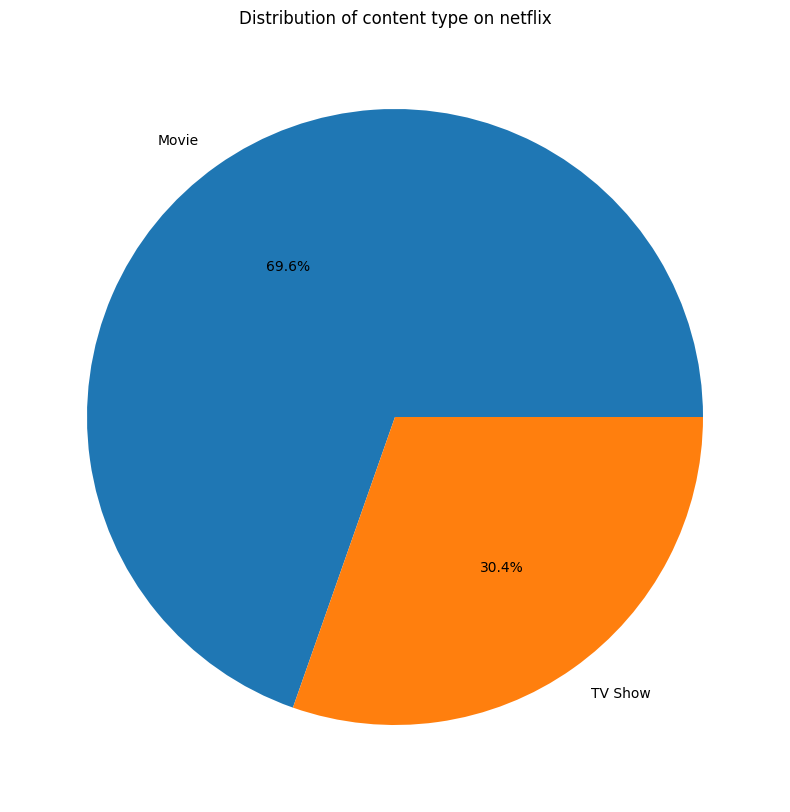

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
df['type'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(10,10))
plt.title("Distribution of content type on netflix")
plt.ylabel('')
plt.show()

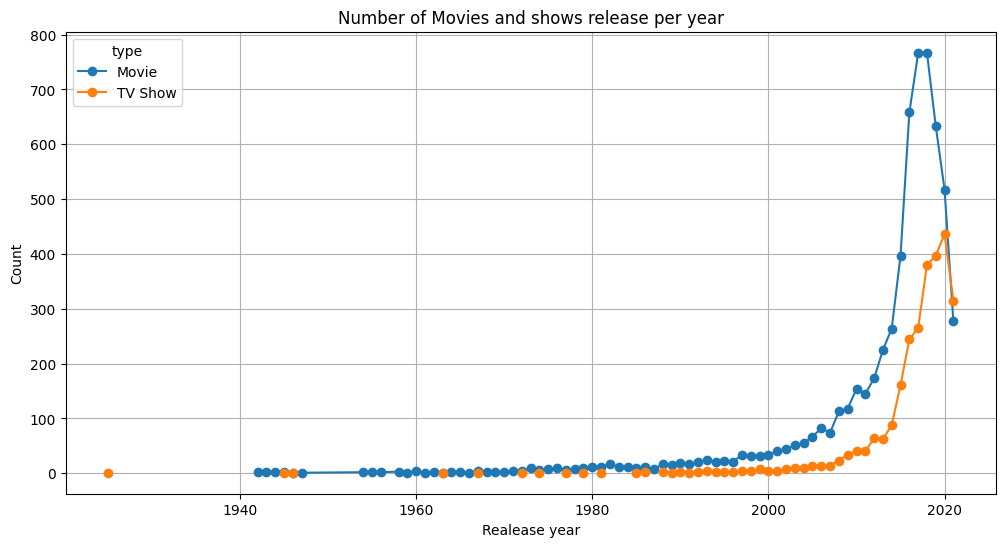

In [8]:
## Count content type by release year
relaese_trend=df.groupby(['release_year','type']).size().unstack()
relaese_trend

relaese_trend.plot(kind='line',figsize=(12,6), marker='o')
plt.title("Number of Movies and shows release per year")
plt.xlabel('Realease year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

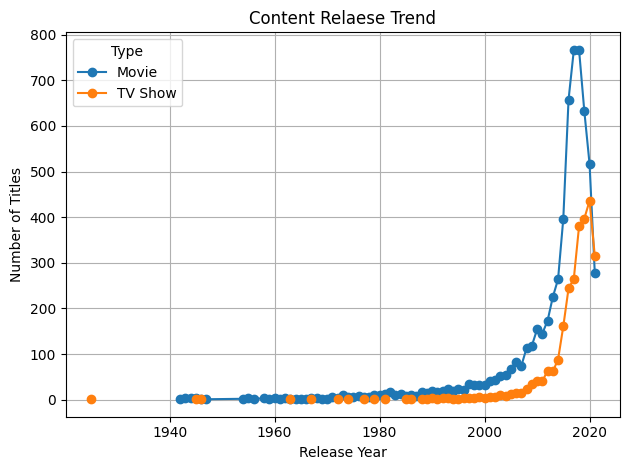

In [9]:
plt.figure(figsize=(12,6))
relaese_trend.plot(kind='line',marker='o')
plt.title('Content Relaese Trend')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.legend(title='Type')
plt.tight_layout()
plt.show()

<ipython-input-10-be69c68d35b1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


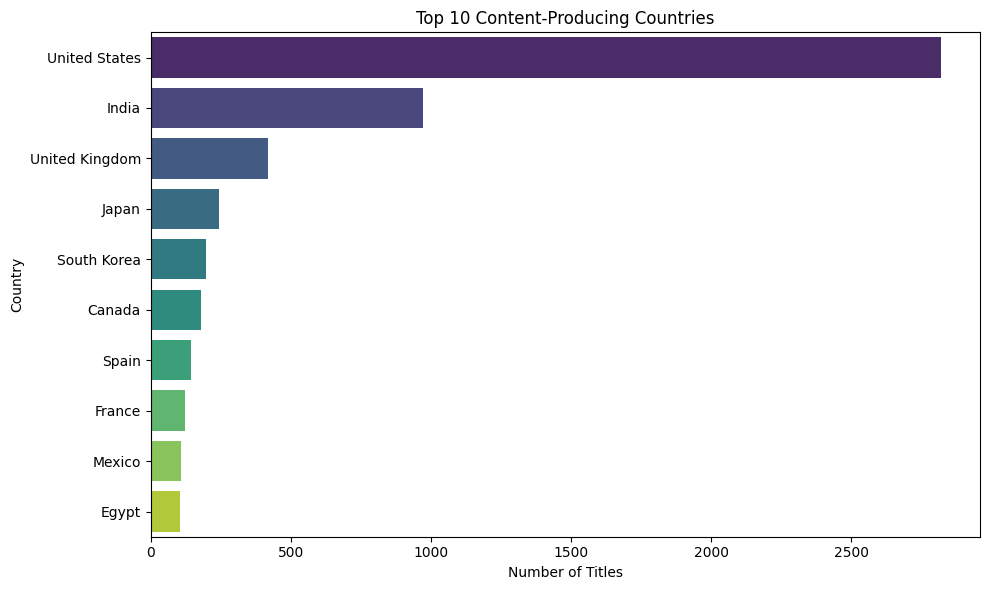

In [10]:
#🔢 Top 10 Content-Producing Countries
top_countries=df['country'].value_counts().head(10)
top_countries

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Content-Producing Countries')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

International Movies        2752
Dramas                      2426
Comedies                    1674
International TV Shows      1350
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
dtype: int64


<ipython-input-11-f6d38fc14d3d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='coolwarm')


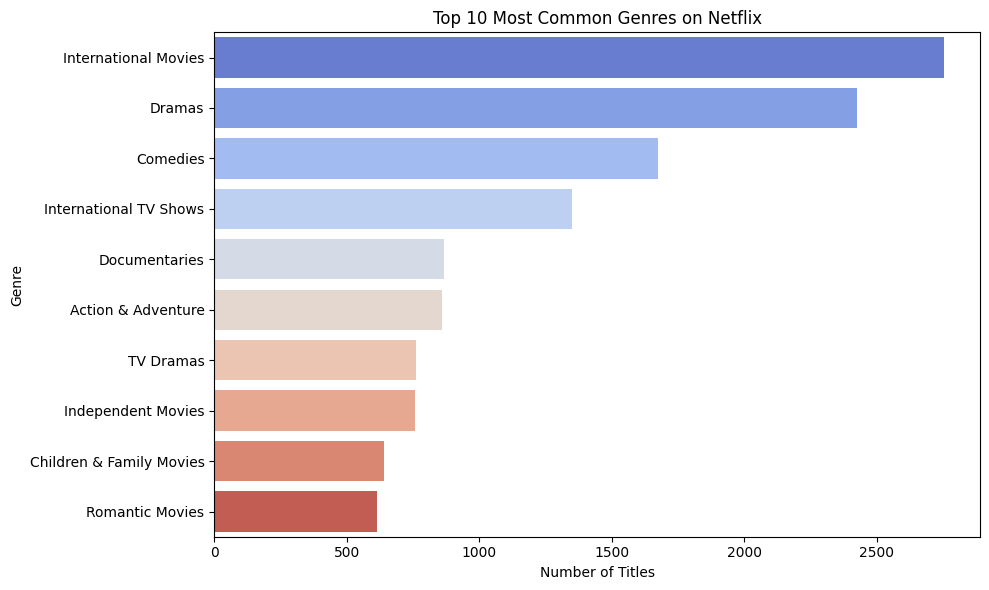

In [11]:
#🎭 Most Common Genres on Netflix
# Split the genres and count each one
from collections import Counter

genre_series = df['listed_in'].dropna().apply(lambda x: [genre.strip() for genre in x.split(',')])
all_genres = [genre for sublist in genre_series for genre in sublist]
genre_counts = Counter(all_genres)
# Get the top 10 genres
top_genres = pd.Series(dict(genre_counts)).sort_values(ascending=False).head(10)
print(top_genres)

plt.figure(figsize=(10,6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='coolwarm')
plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

In [12]:
#📊 Step: Top 10 Countries Producing Most Content
# Drop missing values in 'country' column
country_series=df['country'].dropna()

# Split countries in rows with multiple entries
country_list=country_series.apply(lambda x:[c.strip() for c in x.split(',')])

# Flatten the list
all_countries = [c for sublist in country_list for c in sublist]

# Count country occurrences
from collections import Counter
country_counts = Counter(all_countries)

# Convert to Series and get top 10
top_countries = pd.Series(dict(country_counts)).sort_values(ascending=False).head(10)

# Display
print("Top 10 Countries Producing Content:")
print(top_countries)

Top 10 Countries Producing Content:
United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
Japan              317
Spain              232
South Korea        231
Germany            226
Mexico             169
dtype: int64


In [13]:
#📈 Step: Trend of Content Added Over the Years
# Drop missing values in 'cast' and split actor names
cast_series=df['cast'].dropna().apply(lambda x: [actor.strip() for actor in x.split(',')])

# Flatten the list of lists into one list of all actors
all_actors = [actor for sublist in cast_series for actor in sublist]

# Count appearances of each actor
actor_counts = Counter(all_actors)

# Create a Series from the dictionary and get top 10 actors
top_actors = pd.Series(dict(actor_counts)).sort_values(ascending=False).head(10)

# Display top actors
print("Top 10 most frequent actors on Netflix:\n")
print(top_actors)

Top 10 most frequent actors on Netflix:

Unknown             825
Anupam Kher          43
Shah Rukh Khan       35
Julie Tejwani        33
Takahiro Sakurai     32
Naseeruddin Shah     32
Rupa Bhimani         31
Akshay Kumar         30
Om Puri              30
Yuki Kaji            29
dtype: int64


In [15]:
#Step 10: Analyze Director Frequency
# Count occurrences of each director
director_counts=df['director'].dropna().apply(lambda x:[d.strip() for d in x.split(',')])
all_directors=[d for sublist in director_counts for d in sublist]

# Convert to Counter and get top 10
from collections import counter
top_directors=pd.series(dict(counter(all_directors))).sort_values(ascending=False).head(10)
# Display
print("Top 10 most frequent directors:")
print(top_directors)

ImportError: cannot import name 'counter' from 'collections' (/usr/lib/python3.11/collections/__init__.py)

In [16]:
#Step 10: Analyze Director Frequency
# Count occurrences of each director
director_counts=df['director'].dropna().apply(lambda x:[d.strip() for d in x.split(',')])
all_directors=[d for sublist in director_counts for d in sublist]

# Convert to Counter and get top 10
from collections import Counter # Changed 'counter' to 'Counter'
top_directors=pd.Series(dict(Counter(all_directors))).sort_values(ascending=False).head(10) # Changed 'counter' to 'Counter'
# Display
print("Top 10 most frequent directors:")
print(top_directors)

Top 10 most frequent directors:
Unknown                2631
Rajiv Chilaka            22
Jan Suter                21
Raúl Campos              19
Suhas Kadav              16
Marcus Raboy             16
Jay Karas                15
Cathy Garcia-Molina      13
Martin Scorsese          12
Jay Chapman              12
dtype: int64


In [20]:
# Analyze Duration of Content
# Filter only movies
movies_df=df[df['type']=='Movie'].copy()

movies_df['duration']=movies_df(['duration'].str.replace(' min','').astype(int),errors='coerce')

#plot
plt.figure(figsize=(10,5))
sns.histplot(movies_df['duration'], bins=30, color='orange', kde=True)
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

AttributeError: 'list' object has no attribute 'str'

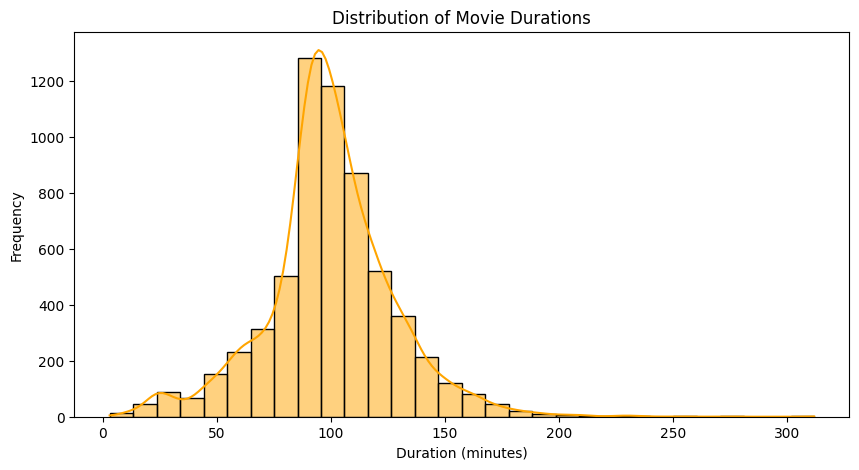

In [19]:
# Analyze Duration of Content
# Filter only movies
movies_df=df[df['type']=='Movie'].copy()

# Replace ' min' and convert to numeric, handling errors
movies_df['duration'] = pd.to_numeric(movies_df['duration'].str.replace(' min', ''), errors='coerce')

# Drop rows with NaN values in 'duration' to avoid issues with plotting or analysis
movies_df = movies_df.dropna(subset=['duration'])

# Convert 'duration' column to integers
movies_df['duration'] = movies_df['duration'].astype(int)

#plot
plt.figure(figsize=(10,5))
sns.histplot(movies_df['duration'], bins=30, color='orange', kde=True)
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

<ipython-input-22-2fbbf3e54aaa>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='duration', data=shows_df, palette='Set2')


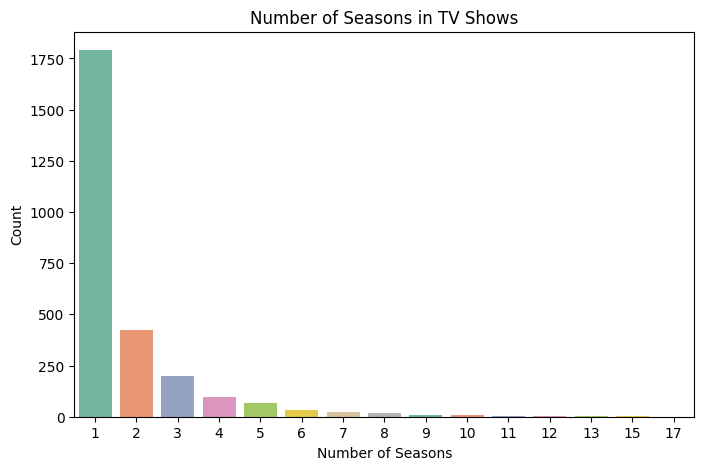

In [22]:
# Filter only TV Shows
shows_df = df[df['type'] == 'TV Show'].copy()

# Remove 'Season(s)' and convert to int
shows_df['duration'] = shows_df['duration'].str.replace(' Season', '').str.replace('s', '').astype(int)

# Plot
plt.figure(figsize=(8, 5))
sns.countplot(x='duration', data=shows_df, palette='Set2')
plt.title('Number of Seasons in TV Shows')
plt.xlabel('Number of Seasons')
plt.ylabel('Count')
plt.show()


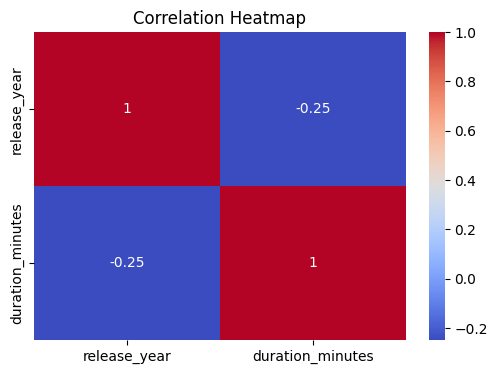

In [23]:
# Create a simplified dataframe for correlation
df_corr = df.copy()

# Handle durations (already cleaned in previous steps)
df_corr['release_year'] = pd.to_numeric(df_corr['release_year'], errors='coerce')

# Create a dummy column for duration
df_corr['duration_minutes'] = pd.to_numeric(df_corr['duration'].str.extract('(\d+)')[0], errors='coerce')

# Drop rows with missing numeric values
df_corr = df_corr[['release_year', 'duration_minutes']].dropna()

# Plot correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [3]:
import pandas as pd

# Load the movies dataset
movies_df = pd.read_csv('/content/tmdb_5000_movies.csv')

# Load the credits dataset
credits_df = pd.read_csv('/content/tmdb_5000_credits.csv')

# Display the first few rows to understand the data structure
print(movies_df.head())
print(credits_df.head())


      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "nam

<ipython-input-3-76870c33ac60>:7: DtypeWarning: Columns (0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264

In [4]:
# Merge datasets on the 'title' column
df=movies_df.merge(credits_df,on='title')
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,Unnamed: 1255,Unnamed: 1256,Unnamed: 1257,Unnamed: 1258,Unnamed: 1259,Unnamed: 1260,Unnamed: 1261,Unnamed: 1262,Unnamed: 1263,Unnamed: 1264
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Inspect and Clean the Data
df.isnull().sum()

,0
budget,0
genres,0
homepage,3096
id,0
keywords,0
...,...
Unnamed: 1260,4809
Unnamed: 1261,4809
Unnamed: 1262,4809
Unnamed: 1263,4809


In [6]:
df.drop(columns=['homepage','status','spoken_lamguages','production_industries'],inplace=True,errors='ignore')
# Display remaining columns
print("Remaining columns:\n", df.columns)

Remaining columns:
 Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries',
       ...
       'Unnamed: 1255', 'Unnamed: 1256', 'Unnamed: 1257', 'Unnamed: 1258',
       'Unnamed: 1259', 'Unnamed: 1260', 'Unnamed: 1261', 'Unnamed: 1262',
       'Unnamed: 1263', 'Unnamed: 1264'],
      dtype='object', length=1282)


In [7]:
## Drop NaN and split genres
from collections import Counter

# Drop NaN and split genres
genre_series = df['genres'].dropna().apply(lambda x: [genre.strip() for genre in x.split(',')])
all_genres = [genre for sublist in genre_series for genre in sublist]

# Count occurrences of each genre
genre_counts = Counter(all_genres)

# Convert to DataFrame and display top 10 genres
genre_df = pd.DataFrame.from_dict(genre_counts, orient='index', columns=['Count']).sort_values(by='Count', ascending=False)
genre_df.head(10)


,Count
"""name"": ""Drama""}",1504
"""name"": ""Comedy""}",1212
"[{""id"": 18",1209
"{""id"": 18",1091
"{""id"": 53",1081
"""name"": ""Action""}",1046
"[{""id"": 35",1042
"""name"": ""Thriller""}]",827
"""name"": ""Drama""}]",796
"{""id"": 10749",789


In [8]:
import json

# Define a function to parse the genre JSON
def extract_genre_names(genre_str):
    try:
        genre_list = json.loads(genre_str.replace("'", '"'))  # convert to valid JSON format
        return [genre['name'] for genre in genre_list]
    except:
        return []

# Apply to the DataFrame
df['genre_list'] = df['genres'].dropna().apply(extract_genre_names)

# Flatten the list of genres
all_genres = [genre for sublist in df['genre_list'] for genre in sublist]

# Count genres
from collections import Counter
genre_counts = Counter(all_genres)

# Display top 10 genres
genre_df = pd.DataFrame.from_dict(genre_counts, orient='index', columns=['Count']).sort_values(by='Count', ascending=False)
genre_df.head(10)


,Count
Drama,2300
Comedy,1723
Thriller,1275
Action,1156
Romance,895
Adventure,792
Crime,697
Science Fiction,538
Horror,520
Family,514


<ipython-input-9-efe3f349b4c3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_df.head(10)['Count'], y=genre_df.head(10).index, palette='coolwarm')


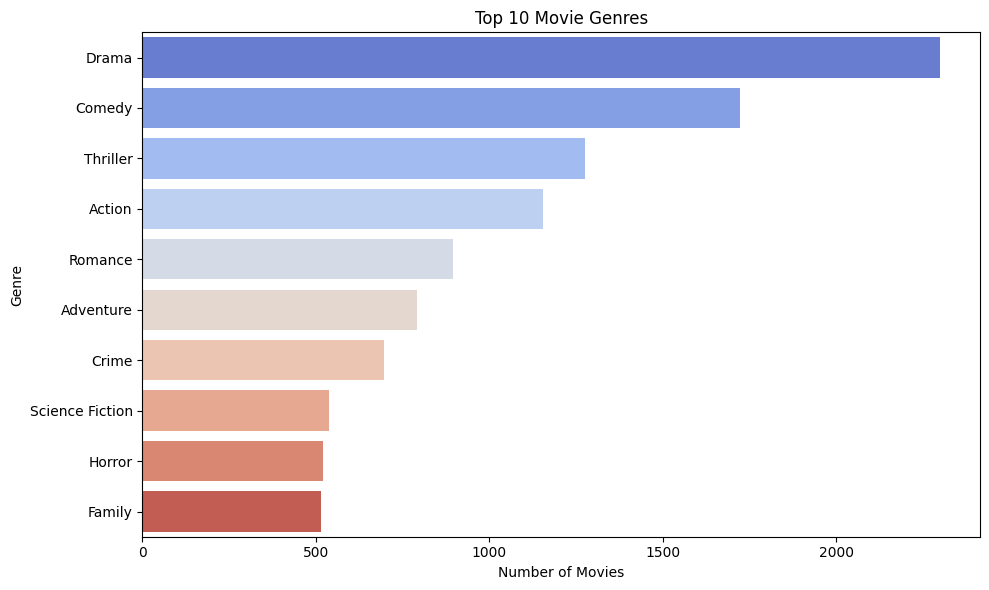

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_df.head(10)['Count'], y=genre_df.head(10).index, palette='coolwarm')
plt.title('Top 10 Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


In [12]:
import ast

# Function to extract names from production_companies JSON
def extract_company_names(companies):
    try:
        company_list = ast.literal_eval(companies)
        return [company['name'] for company in company_list if 'name' in company]
    except:
        return []

# Apply the function
company_series = df['production_companies'].dropna().apply(extract_company_names)
all_companies = [company for sublist in company_series for company in sublist]
company_counts = pd.Series(all_companies).value_counts().head(10)

company_counts


,count
Warner Bros.,320
Universal Pictures,311
Paramount Pictures,285
Twentieth Century Fox Film Corporation,223
Columbia Pictures,201
New Line Cinema,165
Metro-Goldwyn-Mayer (MGM),122
Touchstone Pictures,118
Walt Disney Pictures,114
Relativity Media,102


       vote_average    vote_count
count   4809.000000   4809.000000
mean       6.092514    690.331670
std        1.193989   1234.187111
min        0.000000      0.000000
25%        5.600000     54.000000
50%        6.200000    235.000000
75%        6.800000    737.000000
max       10.000000  13752.000000


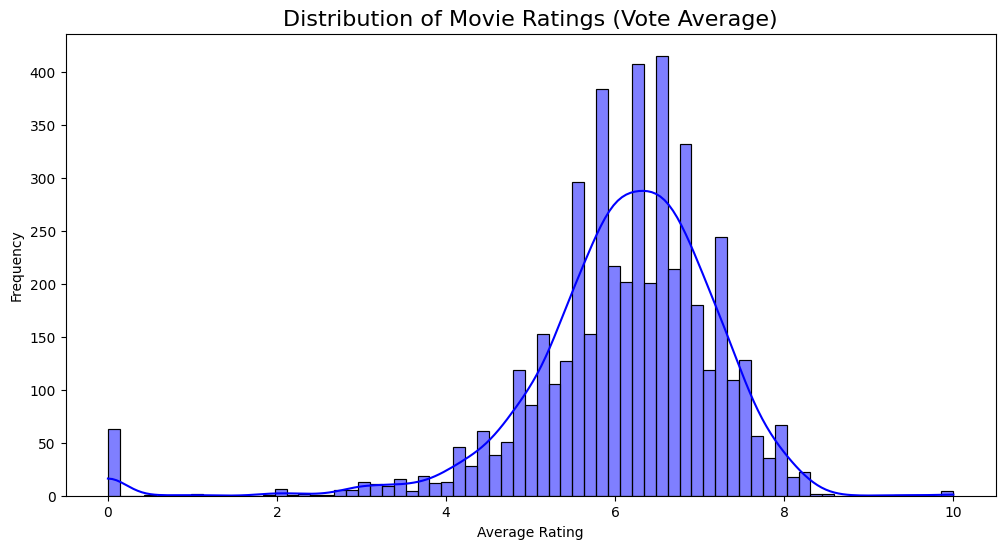

In [13]:
# Inspecting 'vote_average' and 'vote_count' columns
print(df[['vote_average', 'vote_count']].describe())
plt.figure(figsize=(12, 6))
sns.histplot(df['vote_average'], kde=True, color='blue')
plt.title('Distribution of Movie Ratings (Vote Average)', fontsize=16)
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()


       vote_average    vote_count
count   4809.000000   4809.000000
mean       6.092514    690.331670
std        1.193989   1234.187111
min        0.000000      0.000000
25%        5.600000     54.000000
50%        6.200000    235.000000
75%        6.800000    737.000000
max       10.000000  13752.000000


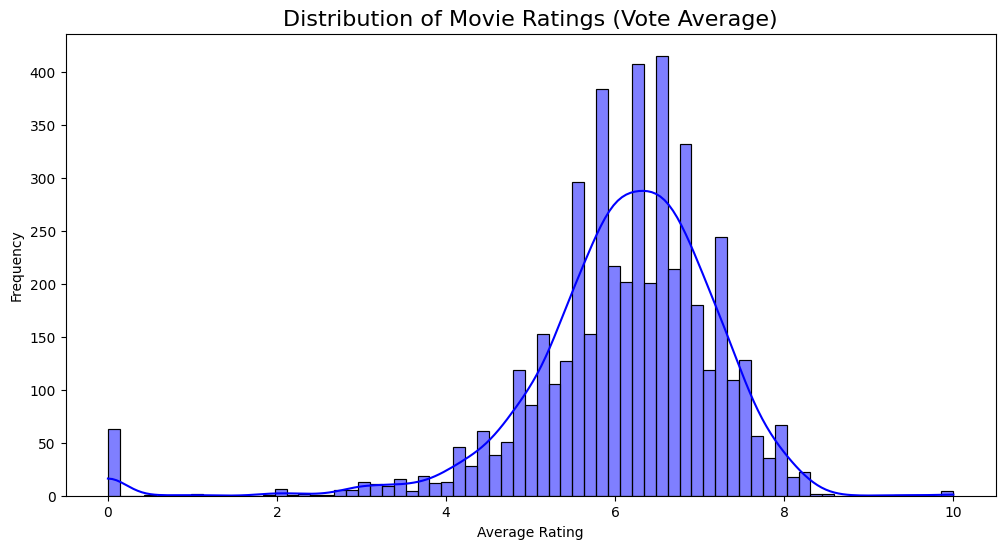

In [14]:
# Inspecting 'vote_average' and 'vote_count' columns
print(df[['vote_average', 'vote_count']].describe())
plt.figure(figsize=(12, 6))
sns.histplot(df['vote_average'], kde=True, color='blue')
plt.title('Distribution of Movie Ratings (Vote Average)', fontsize=16)
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()


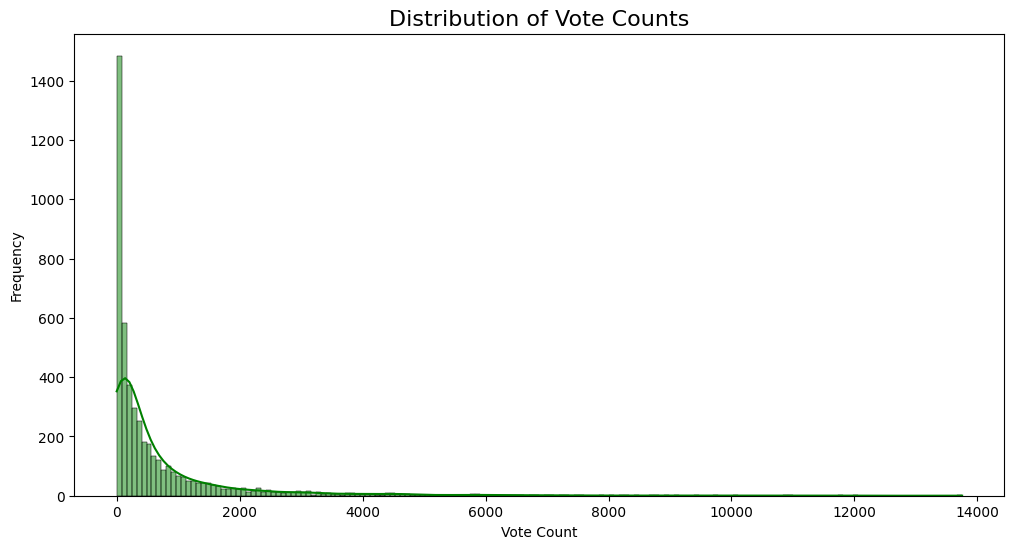

In [15]:
plt.figure(figsize=(12, 6))
sns.histplot(df['vote_count'], kde=True, color='green')
plt.title('Distribution of Vote Counts', fontsize=16)
plt.xlabel('Vote Count')
plt.ylabel('Frequency')
plt.show()


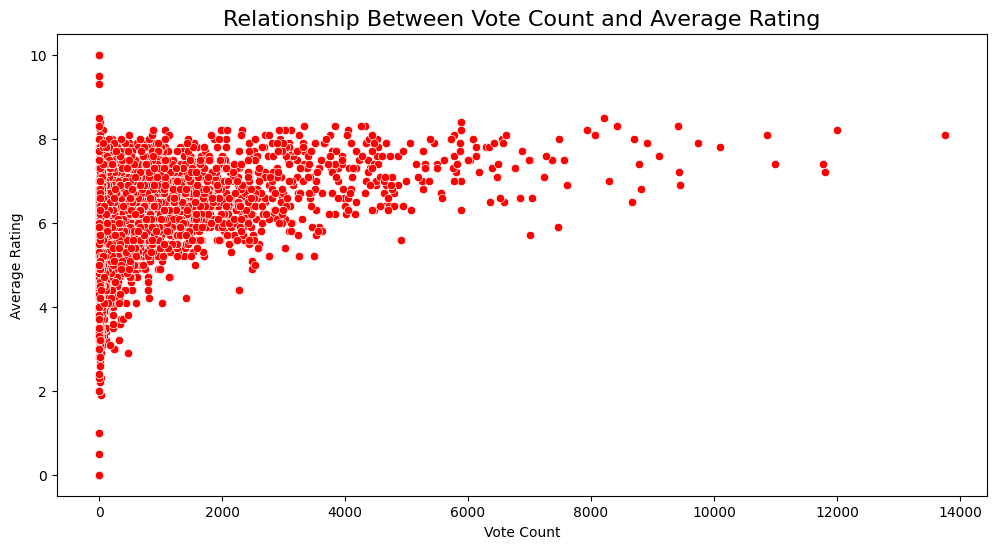

In [16]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='vote_count', y='vote_average', data=df, color='red')
plt.title('Relationship Between Vote Count and Average Rating', fontsize=16)
plt.xlabel('Vote Count')
plt.ylabel('Average Rating')
plt.show()


In [17]:
# Filter for movies with more than 1000 votes
top_rated_movies = df[df['vote_count'] > 1000].sort_values(by='vote_average', ascending=False)

# Display the top 10 rated movies
top_rated_movies[['title', 'vote_average', 'vote_count']].head(10)


,title,vote_average,vote_count
1883,The Shawshank Redemption,8.5,8205
3340,The Godfather,8.4,5893
3235,Pulp Fiction,8.3,8428
3870,Whiplash,8.3,4254
2296,Spirited Away,8.3,3840
662,Fight Club,8.3,9413
1820,Schindler's List,8.3,4329
2733,The Godfather: Part II,8.3,3338
65,The Dark Knight,8.2,12002
2249,Princess Mononoke,8.2,1983


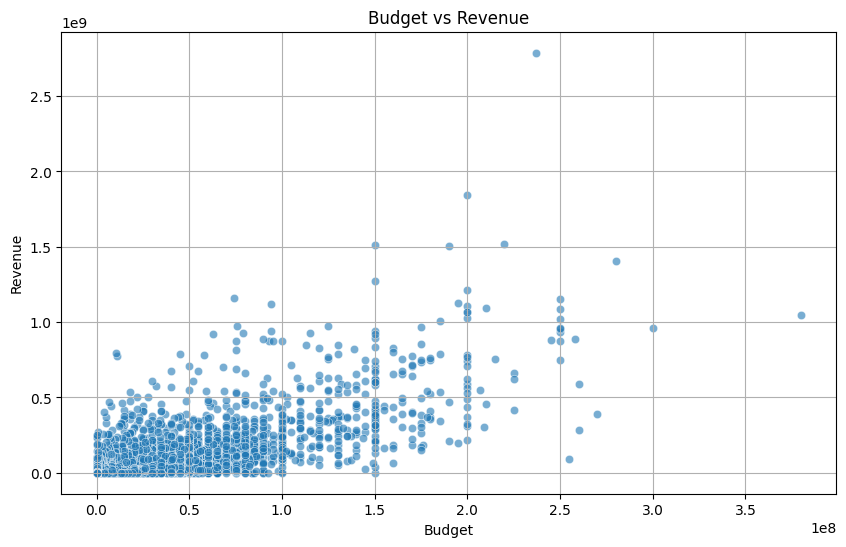

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='budget', y='revenue', alpha=0.6)
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

In [19]:
# Avoid division by zero and filter valid budgets
df_roi = df[(df['budget'] > 0) & (df['revenue'] > 0)].copy()
df_roi['roi'] = (df_roi['revenue'] - df_roi['budget']) / df_roi['budget']

# Top 10 movies with highest ROI
top_roi = df_roi[['title', 'budget', 'revenue', 'roi']].sort_values(by='roi', ascending=False).head(10)
top_roi


,title,budget,revenue,roi
4243,Modern Times,1,8500000,8.499999e+06
3140,Nurse 3-D,10,10000000,9.999990e+05
4583,Paranormal Activity,15000,193355800,1.288939e+04
4588,Tarnation,218,1162014,5.329339e+03
4502,The Blair Witch Project,60000,248000000,4.132333e+03
4730,Eraserhead,10000,7000000,6.990000e+02
4794,Pink Flamingos,12000,6000000,4.990000e+02
4748,Super Size Me,65000,28575078,4.386166e+02
4729,The Gallows,100000,42664410,4.256441e+02
4520,Open Water,130000,54667954,4.195227e+02


In [20]:
# Step 1: Extract and normalize genres
import ast

df['genres'] = df['genres'].dropna().apply(lambda x: [genre['name'] for genre in ast.literal_eval(x)] if x != '[]' else [])
df_genres = df[['title', 'roi', 'genres']].explode('genres')

# Step 2: Clean up
df_genres = df_genres[df_genres['genres'].notnull()]
df_genres = df_genres[df_genres['roi'].notnull()]

# Step 3: Group and sort
genre_roi = df_genres.groupby('genres')['roi'].mean().sort_values(ascending=False)

# Step 4: Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_roi.values[:10], y=genre_roi.index[:10], palette='viridis')
plt.title('Top 10 Genres by Average ROI')
plt.xlabel('Average ROI')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


KeyError: "['roi'] not in index"